In [ ]:

import matplotlib.pyplot as plt

import numpy as np
import sounddevice as sd


In [98]:

BASE_FREQ = 261.63



class N:

  def __init__(self, tone: int, duration: float = 1):
    self.tone = tone
    self.duration = duration
  
    self.frequency = BASE_FREQ * 2 ** (self.tone / 12)
    t = np.linspace(0, self.duration, int(22040 * self.duration))
    self.waveform = np.sin(2 * np.pi * self.frequency * t)
    self.envelope = np.exp(-4 * t)
    self.sound = (self.waveform * self.envelope * 0.3).astype(np.float32)
  
n = N(-12,1)

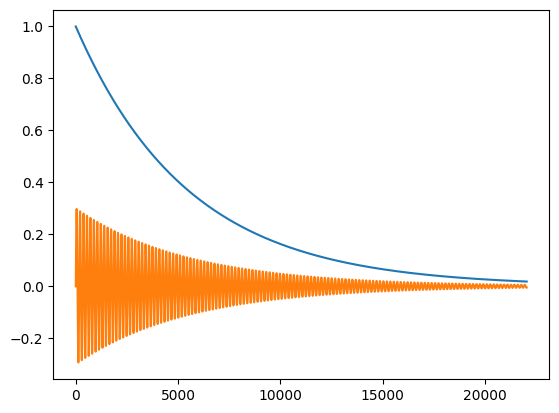

In [99]:
plt.plot(n.envelope)
plt.plot(n.sound)

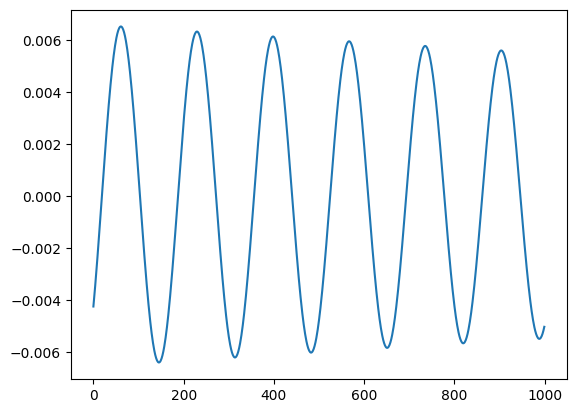

In [83]:
plt.plot(n.sound[-1000:])

## multi play

In [ ]:


def concatenate(nodes):
  return np.concatenate([note.sound for note in nodes])

def play(nodes):
  sd.play(concatenate(nodes), samplerate=22040)
  sd.wait()


melody = [
  N(0),
  N(2,1/4),
  N(4,3/4),
  N(5,1/4),
  N(7,3/4),
  N(0)]


play(melody)


In [ ]:
base = [
  N(0 - 12),
  N(4 - 12),
  N(7 - 12),
  N(0 - 12),
  ]


stream = concatenate(base) + concatenate(melody)

sd.play(stream, samplerate=22050)
sd.wait()
